In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

# Вспоминаем numpy

В большинстве приложений для анализа данных основной интерес представляет следующая функциональность:
+ быстрые векторные операции для переформатирования и очистки данных, выборки подмножеств и фильтрации, преобразований и других видов вычислений;
+ стандартные алгоритмы работы с  массивами, например фильтрация, удаление дубликатов и теоретико-множественные операции;
+ эффективная описательная статистика, агрегирование и  обобщение данных;
+ выравнивание данных и реляционные операции объединения и соединения разнородных наборов данных;
+ описание условной логики в виде выражений-массивов вместо циклов с ветвлением if-elif-else;
+ групповые операции с данными (агрегирование, преобразование, применение функции).

**Сравнение быстродействия**

In [31]:
array_ = np.arange(1000000)
list_ = list(array_)

In [32]:
%%time 
array_2 = array_ * 2

Wall time: 4 ms


In [33]:
%%time 
list_2 = []
for i in list_:
    list_2.append(i * 2)

Wall time: 443 ms


In [34]:
%%time 
list_2 = [i * 2 for i in list_]

Wall time: 305 ms


**Многомерные массивы**

In [35]:
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])

In [36]:
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

In [37]:
type(data)

numpy.ndarray

In [38]:
data * 2

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

In [39]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

ndarray – это обобщенный многомерный контейнер для однородных данных, т. е. в нем могут храниться только элементы одного типа. У любого массива есть атрибут shape – кортеж, описывающий размер по каждому измерению,
и атрибут dtype – объект, описывающий тип данных в массиве:

In [40]:
data.shape

(2, 3)

In [41]:
data.dtype

dtype('float64')

In [42]:
np.array(["str", 1])

array(['str', '1'], dtype='<U11')

In [43]:
np.array(["str", 1]) * 2

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U11'), dtype('int32')) -> None

**Создание массивов**

In [ ]:
np.ones(10)

In [ ]:
np.zeros(10)

In [ ]:
np.arange(10)

**Задани 1**
+ Создать единичную матрицу 4x4;
+ Создать матрицу 4x4, заполненную 5.

In [ ]:
#Создать единичную матрицу 4x4
np.eye(4, 4)

In [ ]:
#Создать матрицу 4x4, заполненную 5
np.full((4,4), 5)

**Возведение элементов матрицы в квадрат и возведение матрицы в квадрат**

In [ ]:
m = np.array([[1, 2, 3], [4, 5, 6], [1, 2, 3]])
m

In [ ]:
m ** 2

In [ ]:
np.dot(m, m)

In [ ]:
m @ m

## Индексирование

In [ ]:
m[0]

In [ ]:
m[0, 0]

In [ ]:
m[0][1:]

**Булево индексирование**

In [ ]:
m%2 == 1

In [ ]:
m[m%2 == 1]

In [ ]:
m[~m%2 == 1]

In [ ]:
m[~m%2 == 1] = 100
m

In [ ]:
m.T

In [ ]:
np.arange(15)

In [ ]:
arr = np.arange(15).reshape((3, 5))
arr

In [ ]:
arr.swapaxes(0, 1)

In [ ]:
arr.T

**Задание 2**\
Отобрать те строки data, где на соответствующих позициях в names имя Леша или Петя.

In [ ]:
names = np.array(["Настя", "Петя", "Вася", "Юра", "Паша", "Леша", "Леша"])
data = np.array([[4, 8], [1, 5], [-3, 9], [99, 0], [13, 22], [12, 49], [31, 4]])

In [ ]:
# ваш ответ здесь
data[(names == 'Леша') | (names == 'Петя')]

## Быстрые поэлементные операции над массивами

In [ ]:
arr = np.arange(10)

In [ ]:
np.sqrt(arr)

In [ ]:
np.exp(arr)

In [ ]:
np.maximum(np.sqrt(arr), np.exp(arr)/3)

In [ ]:
np.floor(np.sqrt(arr)) # округление до целого

In [ ]:
np.ceil(np.sqrt(arr)) # округление до целого в большую сторону

In [ ]:
np.round(np.sqrt(arr)) #округление по правилам

## Программирование на основе массивов

In [ ]:
points = np.arange(-5, 5, 0.01) # 100 равноотстоящих точек
xs, ys = np.meshgrid(points, points)
ys

In [ ]:
xs

In [ ]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [ ]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [ ]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

In [ ]:
result = np.where(cond, xarr, yarr)

In [ ]:
np.where(xarr > 1.3, 2, xarr)

**Задача 3**\
Сгенерировать массив из случайных положительных чисел произвольной длины. Вывести элементы, которые больше среднего арифметического.

In [ ]:
arr = np.random.randint(1, high = 54, size = np.random.randint(3, 54))
arr[arr > arr.mean()]

**Задача 4**\
Сгенерировать массив из 20 случайных элементов, элементы которого лежат в интервале [0, 10].
+ Определить количество элементов, отличающихся от минимального на 5.
+ Найти среднее арифметическое всех четных элементов массива, стоящих на нечетных местах.

In [ ]:
arr = np.random.randint(0, high = 11, size = 20)
arr

In [ ]:
#Определить количество элементов, отличающихся от минимального на 5
arr[arr == arr.min() + 5].size

In [ ]:
#Найти среднее арифметическое всех четных элементов массива, стоящих на нечетных местах
indeces = np.where((arr%2 == 0) & (np.arange(len(arr)) % 2 == 1))
if indeces[0].size > 0:
    el = arr[indeces]
    avg = np.mean(el)
    print(avg)
else:
    print('None')

**Задача 5**\
Сгенерировать матрицу A размером 5 на 5, элементы которой лежат в интервале [1, 10].
+ Возвести в квадрат максимальный элемент матрицы.
+ Все четные числа заменить на 0.

In [ ]:
#5
m = np.random.randint(1, high = 11, size = (5,5))
m

In [ ]:
#Возвести в квадрат максимальный элемент матрицы
a = m.max()
for i in range(len(m)):
    for j in range(len(m[i])):
        if m[i][j] == a:
            m[i][j] = m[i][j] ** 2
print(m)

In [ ]:
#Все четные числа заменить на 0
m[m%2 == 0] = 0
m

**Задача 6**\
Сгенерировать матрицу B размером 5 на 5, элементы которой лежат в интервале [-5, 5]. Отрицательные элементы матрицы заменить на число отрицательных элементов в строке, в которой они находятся.

In [ ]:
B = np.random.randint(-5, high = 5, size = (5,5))
B

In [ ]:
for i in range(B.shape[0]):
    count = np.sum(B[i] < 0)
    B[i] = np.where(B[i] < 0, count, B[i])
B

# Вспоминаем pandas несильно

Какие отличия между исследовательскими университетами и школами искусств?
Используя данные из файла colleges, выдвините предположения о возможных различиях между двумя типами институтов.
Для это проведите описательный анализ исходных данных.  Выдвините несколько гипотез.
Например, "В университеты поступить сложнее (процент принятых меньше)"

Формат файла
+ School -  название школы
+ School_Type - тип школы (школа искусств  'LibArts', исследовательский университет 'Univ')
+ SAT - медиана объединенных значений Math и Verbal SAT  студентов
+ Acceptance: - % принятых абитуриентов
+ $/Student  -  Деньги, расходуемые на одного студента в среднем
+ Top 10% -  % студентов в топ 10% выпускных классов
+ %PhD -  %  факультетов, имеющих PhD
+ Grad%: % студентов, которые успешно завершили обучение

In [44]:
df = pd.read_csv('colleges.txt', delimiter='\t')

In [45]:
df.head()

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


В сведения о датафрейме входит общая информация о нём вроде заголовка, количества значений, типов данных столбцов.

In [ ]:
df.info()

Вывод статистических сведений о датафрейме:

In [ ]:
df.describe()

**Задание 1**\
Проверить являются ли выборки связными.

**Задание 2**\
Постройте ящики с усами по каждой из характеристик (SAT ... Grad%) для каждого типа институтов. Какие из следующих утверждений верны (речь идет о наблюдаемых данных)?

In [ ]:
%%HTML
<input type="checkbox" id="0">
<label for="0">% процент принятых студентов в школах искусств заметно ниже, чем в университетах</label><br>

<input type="checkbox" id="1">
<label for="1">Разброс средств, расходуемых в среднем на одного студента, в школах искусств больше, чем в университетах</label><br>

<input type="checkbox" id="2">
<label for="2">% процент принятых студентов в школах искусств и в университетах примерно равны</label><br>

<input type="checkbox" id="3">
<label for="3">Разброс баллов SAT в университетах ниже, чем в школах искусств</label><br>

<input type="checkbox" id="0">
<label for="0">Разброс баллов SAT в университетах выше, чем в школах искусств</label><br>

<input type="checkbox" id="0">
<label for="0">Разброс средств, расходуемых в среднем на одного студента, в школах искусств меньше, чем в университетах</label><br>

<input type="checkbox" id="0">
<label for="0">В одном из университетов тратят сильно больше денег в среднем на одного студента, чем в других университетах</label><br>

<input type="checkbox" id="0">
<label for="0">Разброс баллов SAT в университетах и школах искусств практически не различается</label><br>

<input type="checkbox" id="0">
<label for="0">% процент принятых студентов в школах искусств заметно выше, чем в университетах</label><br>

Верные утверждения: 3, 5,6,7

<AxesSubplot:title={'center':'Grad%'}, xlabel='School_Type'>

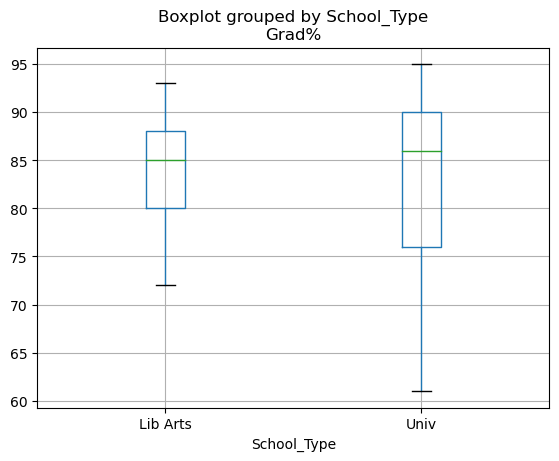

In [52]:
df1 = df.loc[:, 'School_Type':'Grad%']
df1.boxplot(by = 'School_Type', column = 'Grad%')


<AxesSubplot:title={'center':'SAT'}, xlabel='School_Type'>

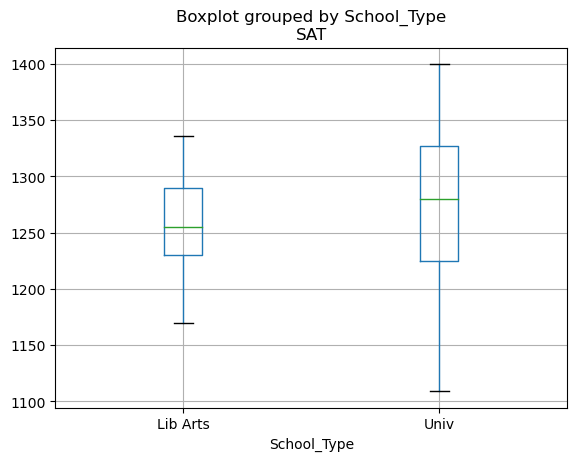

In [54]:
df1.boxplot(by = 'School_Type', column = 'SAT')

In [ ]:
df1.boxplot(by = 'School_Type', column = 'Acceptance')

In [ ]:
df1.boxplot(by = 'School_Type', column = '$/Student')

In [ ]:
df1.boxplot(by = 'School_Type', column = 'Top 10%')

In [ ]:
df1.boxplot(by = 'School_Type', column = '%PhD')

**Задание 3**\
Постройте гистограммы по каждой из характеристик (SAT ... Grad%) для каждого типа институтов. Какие из следующих утверждений верны (речь идет о наблюдаемых данных)?

Hint: для каждой пары связанных утверждений, надо выбрать одно из них.

In [ ]:
%%HTML
<input type="checkbox" id="0">
<label for="0"></label>Распределение процента факультетов с Phd в школах искусств напоминает "нормальное"<br>

<input type="checkbox" id="1">
<label for="1">Распределение процента факультетов с Phd в университетах напоминает "нормальное"</label><br>

<input type="checkbox" id="2">
<label for="2"></label>Гистограмма процента студентов, которые успешно завершили университеты, имеет несколько пиков<br>

<input type="checkbox" id="3">
<label for="3">Гистограмма процента студентов, которые успешно завершили школы искусств, имеет несколько пиков</label><br>

<input type="checkbox" id="5">
<label for="5">В университетах процент факультетов с Phd выше</label><br>

<input type="checkbox" id="4">
<label for="4">В школах искусств процент факультетов с Phd выше</label><br>

Верные утверждения: 4, 5

array([<AxesSubplot:title={'center':'Lib Arts'}>,
       <AxesSubplot:title={'center':'Univ'}>], dtype=object)

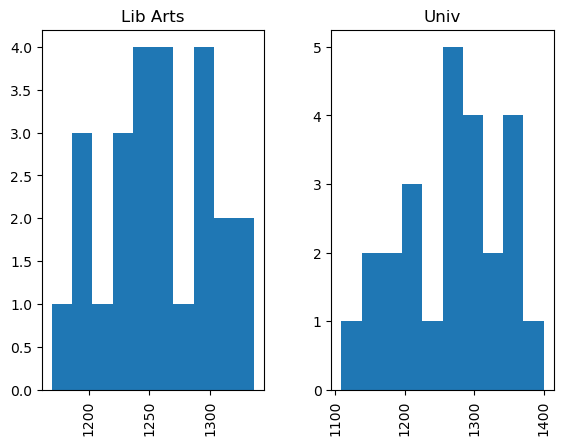

In [56]:
df1.hist(column='SAT' , by='School_Type')

In [ ]:
df1.hist(column='Acceptance' , by='School_Type')

In [ ]:
df1.hist(column='$/Student' , by='School_Type')

In [ ]:
df1.hist(column='Top 10%' , by='School_Type')

In [ ]:
df1.hist(column='%PhD' , by='School_Type')

In [ ]:
df1.hist(column='Grad%' , by='School_Type')

**Задание 4**\
Найдите:
+ выборочное среднее SAT школ искусств;
+ 3й выборочный квартиль Acceptance университетов;
+ название института(колледжа), в котором тратят денег в среднем на одного студента больше, чем в других институтах(колледжах).

In [ ]:
df[df['School_Type'] == 'Lib Arts']['SAT'].mean()

In [ ]:
np.percentile(df[df['School_Type'] == 'Univ']['Acceptance'], 75)

In [ ]:
df[df['$/Student'] == df['$/Student'].max()]['School']